# Analysis of suicide data

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# sns.set_style('whitegrid')
sns.set_theme(style="darkgrid")
# plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Remove space in ' gdp_for_year ($) '

In [4]:
df.columns = [x.strip() for x in df.columns]
df.columns

# The same using rename function, which is sometimes more convenient
# df = df.rename({' gdp_for_year ($) ':'gdp_for_year ($)'}, axis = 1, inplace=True)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Austria,NaN,female,55-74 years,NaN,NaN,NaN,Turkmenistan1990,NaN,"2,359,903,108",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


Match the generation and age interval

In [7]:
df.groupby('age')[['generation']].nunique()

,generation
age,
15-24 years,2
25-34 years,3
35-54 years,3
5-14 years,3
55-74 years,3
75+ years,2


The generation and the corresponding age are different for some countries, so it seems more reasonable to use age instead of generation. 

(0.0, 80.0)

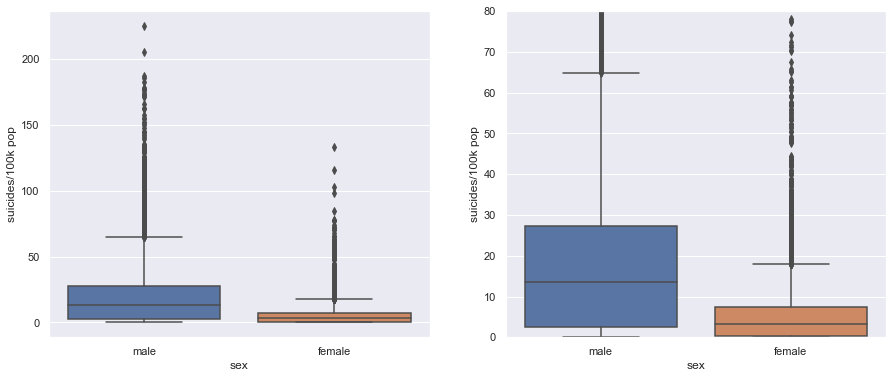

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(y = 'suicides/100k pop', x = 'sex', data = df, ax = ax1)
sns.boxplot(y = 'suicides/100k pop', x = 'sex', data = df, ax = ax2)
plt.ylim(0, 80)

Boxplot shows no outliers in our data (both in population and suicides_no columns).

Further I will mostly use suicides/100k column, even though it is not strictly correct to sum data of this column, since it better represents suicides rate than just suicides_no

# Data for all countries 

In [9]:
df_piot_sex = df.pivot_table(index = 'sex', aggfunc='mean')[['gdp_per_capita ($)', 'population', 'suicides/100k pop', 'suicides_no']]
df_piot_sex

,gdp_per_capita ($),population,suicides/100k pop,suicides_no
sex,,,,
female,16866.464414,1.888769e+06,5.392866,112.114306
male,16866.464414,1.800818e+06,20.239329,373.034508


Text(0, 0.5, 'average suicide rate')

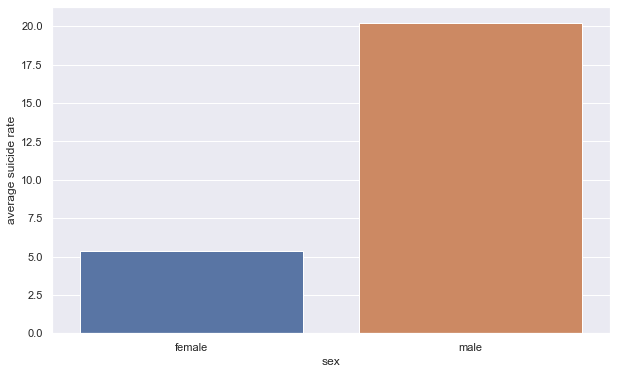

In [10]:
sns.barplot(x = df_piot_sex.index, y = 'suicides/100k pop', data = df_piot_sex)
plt.ylabel('average suicide rate')

Now I'd like to examine the year-wise distribution of suicides/100k pop. Start with no gender segregation.

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

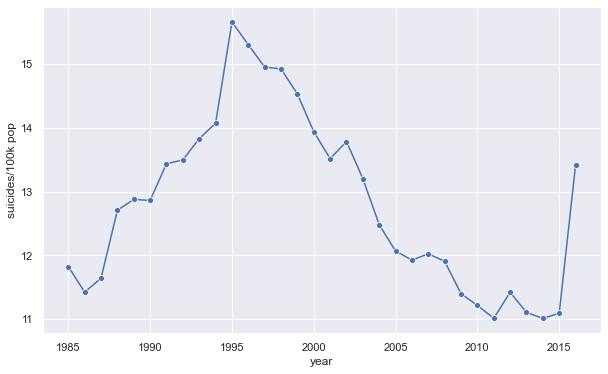

In [11]:
sns.lineplot(x = 'year', y = 'suicides/100k pop', data = df, ci = None, marker = 'o')

And the same for different sexes.

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

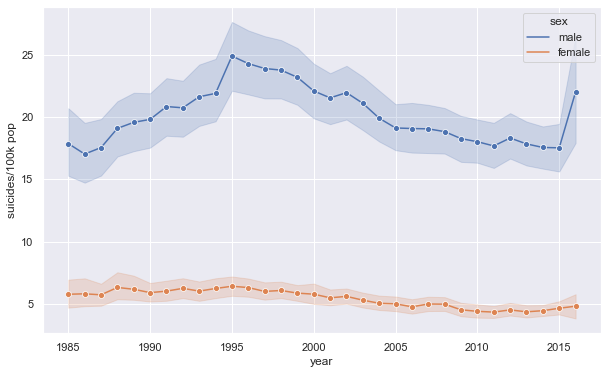

In [12]:
sns.lineplot(x = 'year', y = 'suicides/100k pop', hue = 'sex', data = df, estimator='mean', marker = 'o')

This beautiful graph shows that for each year since 1985 mean (and hence sum) of siucides/100k population is higher and the confidence intervals (0.95 by default) doesn't intercect.

Let's now look at the different countries and determine which of them are leaders in the siucides rates.

In [13]:
ordered_countries = df.groupby('country').mean()['suicides/100k pop'].sort_values(ascending=False).index
n = 20

Countries with top 20 suicide rates.

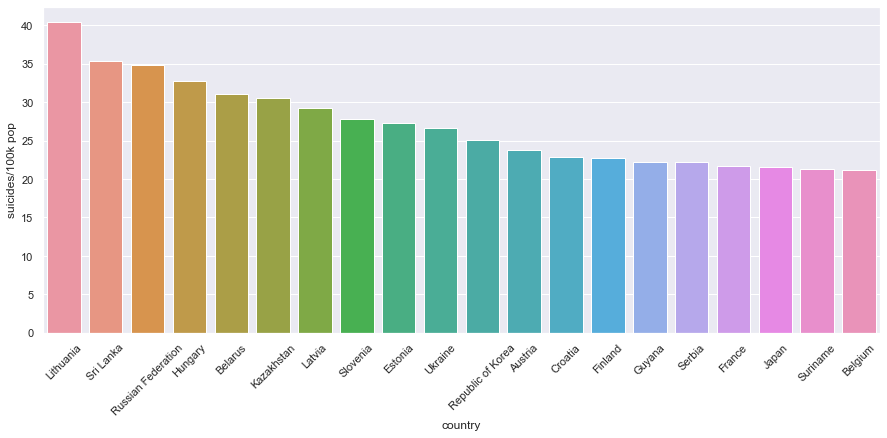

In [14]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'country', y = 'suicides/100k pop', data = df, order=ordered_countries[:n], ci = None)
plt.xticks(rotation = 45);

Counries with the least suicides.

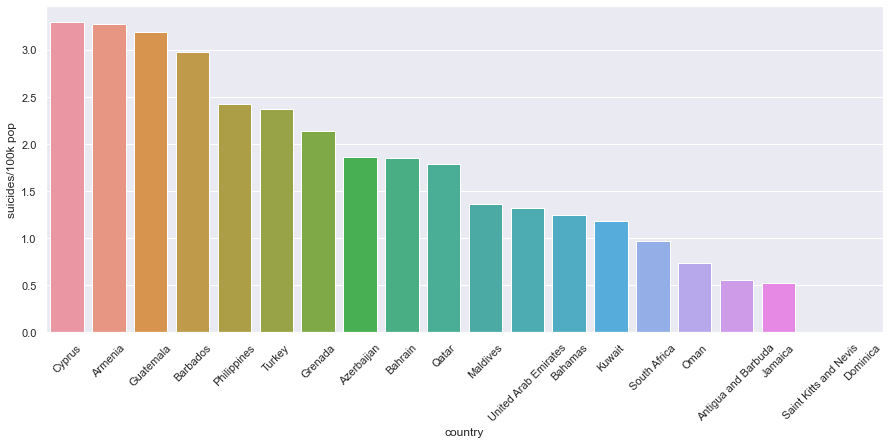

In [15]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'country', y = 'suicides/100k pop', data = df, order=ordered_countries[-n:], ci = None)
plt.xticks(rotation = 45);

And before focusing on one country, lets look at the number of suicides for different ages.

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

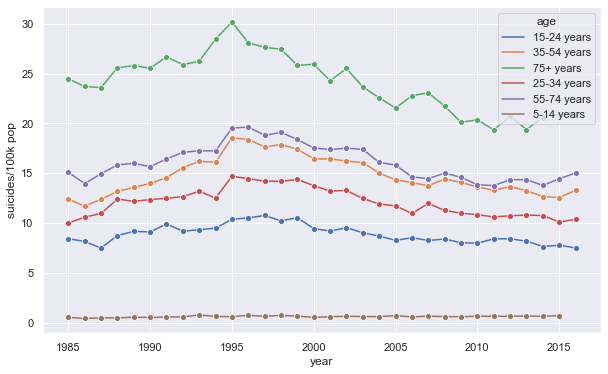

In [16]:
sns.lineplot(x = 'year', y = 'suicides/100k pop', hue = 'age', data = df, ci = None, marker='o' )

Suddenly (at least for me) it turns out that the older the person, the more likely he commits a suicide. 

And the same graph using pie plot for different genders.

In [17]:
pie_male = df[df['sex'] == 'male'].groupby('age').mean()['suicides/100k pop']
pie_female = df[df['sex'] == 'female'].groupby('age').mean()['suicides/100k pop']

Text(0.5, 1.0, 'Average suicide per 100k population for male and female')

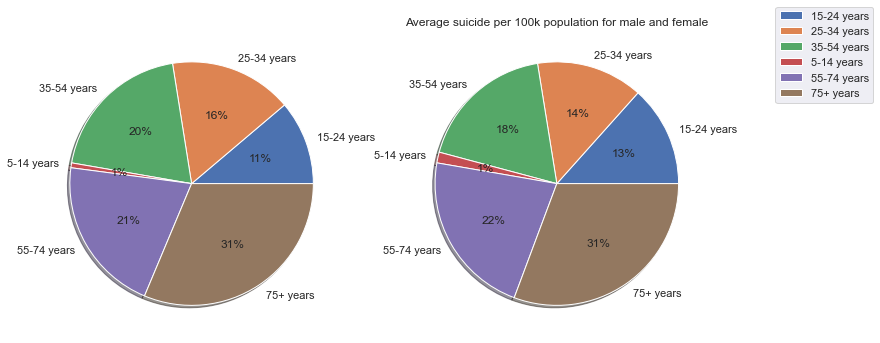

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.pie(pie_male, labels = pie_male.index, shadow = True, autopct='%.0f%%')
ax2.pie(pie_female, labels = pie_female.index, shadow = True, autopct='%.0f%%')
ax2.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Average suicide per 100k population for male and female')

# Focus on Russian data only

In [19]:
df_russia = df[df['country'] == 'Russian Federation']

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

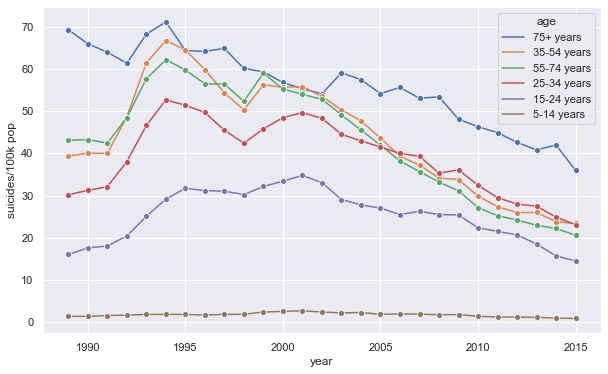

In [20]:
sns.lineplot(x = 'year', y = 'suicides/100k pop', hue = 'age', data = df_russia,
             marker='o', ci = None)

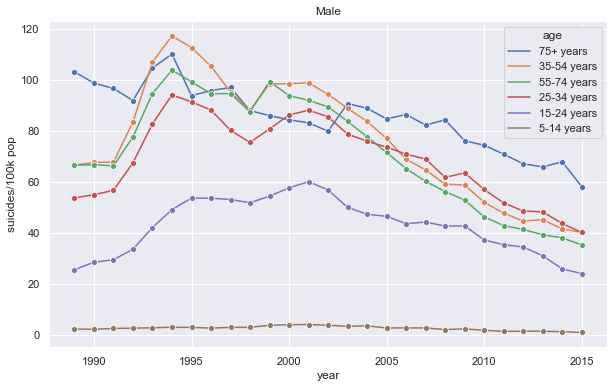

Text(0.5, 1.0, 'Female')

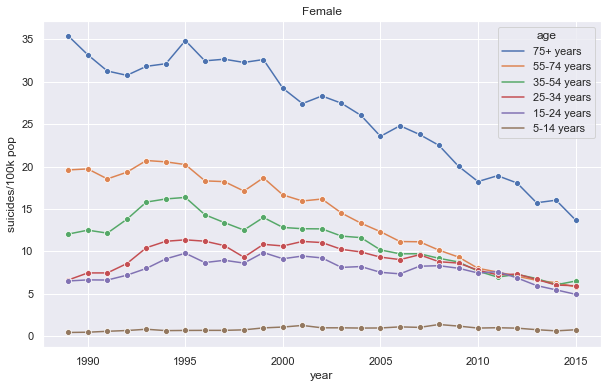

In [21]:
sns.lineplot(x = 'year', y = 'suicides/100k pop', hue = 'age', data = df_russia[df_russia['sex'] == 'male'],
             marker='o', ci = None)
plt.title('Male')
plt.show()
sns.lineplot(x = 'year', y = 'suicides/100k pop', hue = 'age', data = df_russia[df_russia['sex'] == 'female'],
             marker='o', ci = None)
plt.title('Female')

<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

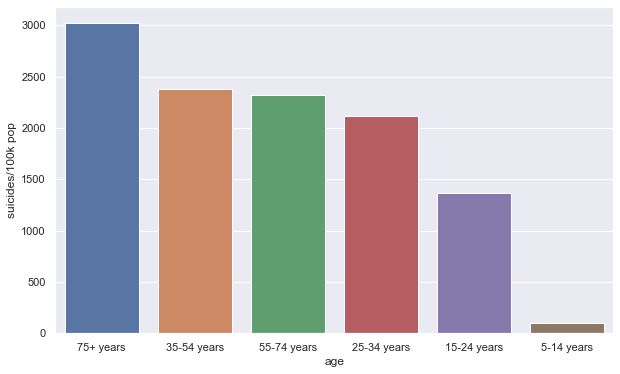

In [22]:
sns.barplot(x = 'age', y = 'suicides/100k pop', data = df_russia, ci = None, estimator=sum)

Russia's age-wise suicides rates look slightly different, but still correspond to the world ones.

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

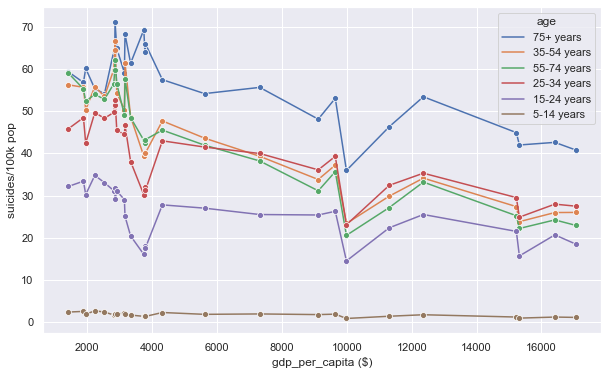

In [23]:
sns.lineplot(x = 'gdp_per_capita ($)', y = 'suicides/100k pop', hue = 'age', data = df_russia, ci = None, marker = 'o')

We also see the decrease of number of suicides with the growth of gdp. 

# The end.